# Project 1

In this project, you will explore using linear regression to solve a problem
in a few different ways.  The particular problem is predicting the miles-per-gallon that a car gets based on a number of characteristics about that car.

To complete this project, you will write Python code in places marked
`# YOUR CODE HERE`.  There are also code cells in this notebook you must run
to produce various kinds of plots and graphs.  There are also a number of cells
marked with `# YOUR ANSWER HERE` where you will answer questions.


In [ ]:
# FILL THESE IN:

# Name: Mwahhid Majeed
# Honor Code Pledge: I affirm that I will not give or receive any unauthorized help on this project, and that all work will be my own

## Getting started

In [94]:
# Set up libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [95]:
# Read data

# Write code below to read the CSV file "cardata.csv" and put it into a
# Pandas dataframe called `df`:

df = pd.read_csv("cardata.csv")
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,carname
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,ford ranger


In [96]:
# Display the first few lines of this data:

print(len(df)) # Should be 392
df.head()  # Verify this looks ok

392


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,carname
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [97]:
# Select only the numeric attributes

# We want to write code to select out the numeric attributes (everything
# except the name of the car).  Our 6 features for X will be
# 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', and 'modelyear'
# while the feature we are predicting will be 'mpg'.

# Write code below to create two new dataframes, one that will become our
# X matrix and one that will become our vector of y values.  
# The X matrix should be called df_X and the vector of y values 
# should be called df_y.

df_X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear']]
df_y = df['mpg']


In [98]:
# Display the first few lines of this data:

print(len(df_X)) # Should be 392
print(len(df_y)) # Should be 392
df_X.head()  # Verify this looks ok

392
392


,cylinders,displacement,horsepower,weight,acceleration,modelyear
0,8,307.0,130,3504,12.0,70
1,8,350.0,165,3693,11.5,70
2,8,318.0,150,3436,11.0,70
3,8,304.0,150,3433,12.0,70
4,8,302.0,140,3449,10.5,70


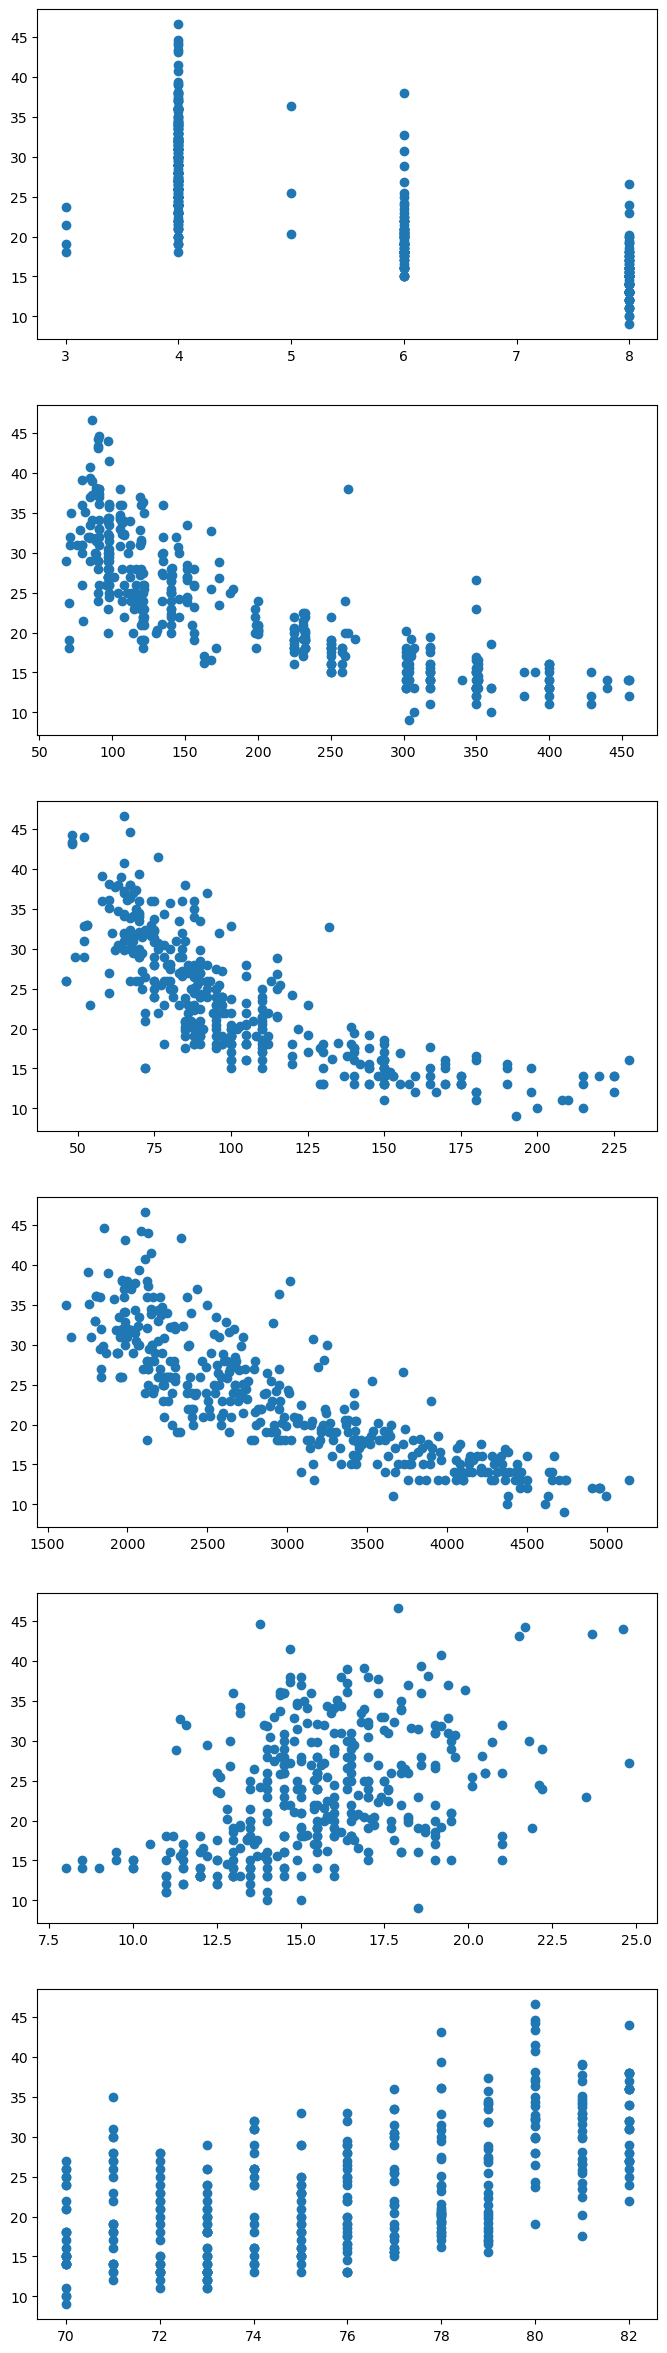

In [99]:
# Visualizing the data

# Run this cell to generate some plots of our input features displayed
# against the feature we're trying to predict (mpg).

fig, ax = plt.subplots(6, figsize=(8,30))
ax[0].scatter(df['cylinders'], df['mpg'])
ax[1].scatter(df['displacement'], df['mpg'])
ax[2].scatter(df['horsepower'], df['mpg'])
ax[3].scatter(df['weight'], df['mpg'])
ax[4].scatter(df['acceleration'], df['mpg'])
ax[5].scatter(df['modelyear'], df['mpg'])
plt.show()

In [100]:
# Convert to numpy arrays

# Write code below to create two new numpy arrays, one for df_X
# called X_train_initial and one for df_y called y_train.
# The name X_train_initial will make sense in a minute.

X_train_initial = df_X.to_numpy()
y_train = df_y.to_numpy()


# Verify data:

print(X_train_initial.shape) # Should be (392, 6)
print(y_train.shape) # Should be (392,)  <--- note ONE dimensional!

(392, 6)
(392,)


In [101]:
# Set up dimensional variables.

# We use m for the number of training examples, and 
# n for the number of features.  
# Calculate these from the data (not hard-coded):

m = X_train_initial.shape[0]
n = X_train_initial.shape[1]

# Verify data:

print(m, n)  # should print 392 6, meaning 392 training examples and 6 features

392 6


In [102]:
# Write code below to add a column of ones to the X_train_initial
# matrix, and store this in a new matrix X_train:

X_train = np.hstack((np.ones((m, 1)), X_train_initial))


# Verify new dimensions:

print(X_train.shape) # Should be (392, 7)

(392, 7)


## Part A: Solving linear regression the "easy" way

Linear regression happens to be one of the few machine learning
algorithms where it is possible to directly "solve" it: we can 
compute the true values for the $w$ vector that will minimize the cost
function $J(\boldsymbol{w})$ by using the calculation:


$$\boldsymbol{w} = (X^T X)^{-1}X^T y$$

In [103]:
# Write code below to compute the w vector directly using
# the equation above.  Store this in a vector called w_direct.

w_direct =  np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train


# Verify:

print(w_direct)

[-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04
 -6.79461791e-03  8.52732469e-02  7.53367180e-01]


In [104]:
# Below, write a sentence about how to interpret these 
# numbers in w_direct, in particular, (1) why are some negative
# and some positive, and (2) what is the special interpretation of
# w_direct[0]?

# YOUR ANSWER HERE:
# The numbers in w_direct are the minimum errors of each component/column
# in X_train against the output y. Some are negative because the predicted data
# is smaller than the actual data which gives a negative error and since we are
# not taking absolute values, the errors are shown with negatives.
# w_direct[0] is the bias.

## Part B: Linear regression the "hard" way




In [105]:
# Define the make_prediction function below to make a
# prediction for one example (one feature vector x_data)
# and parameter vector w.  
# Do this using the dot product (np.dot() function), rather than a loop.

def make_prediction(x_data, w):
    """
    x_data: array of features (n+1)
    w: array of weights (n+1)
    returns: scalar
    """
    
    return np.dot(x_data, w)



In [106]:
# Define the compute_cost function below to compute the
# total cost over the entire data set X_data and y_data,
# given parameters vector w.
# Do not use matrix computations here; call your make_prediction() function
# that you defined above.  You should have one loop.

def compute_cost(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: scalar
    """
        
    total_cost = 0
    for i in range(0, m):
        y = y_data[i] # y(i)
        y_hat = make_prediction(X_data[i], w)
        cost = (y_hat - y) ** 2
        total_cost += cost
    
    return total_cost / (2 * m)

    

In [107]:
# Write code below to compute the cost of our training 
# data on the directly-computed values of w.  That is, compute
# J(w_direct) and store this in a variable called w_direct_cost.
# We know we can't do any better than this cost!

w_direct_cost = compute_cost(X_train, y_train, w_direct)


# Verify:

print("Minimum cost:", w_direct_cost) # should be less than 10

Minimum cost: 5.795085490707611


In [108]:
# Define the compute_gradient function below to compute
# the complete gradient for the function J(w).  
# Do not use matrix computations here; call your make_prediction() function
# that you defined above.  You should have two nested loops.

def compute_gradient(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: array of gradients (n+1)
    """
    
    arr_grad = []
    for j in range(0,n+1):
        total_w = 0
        for i in range(0, m):
            y = y_data[i] # y(i)
            y_hat = make_prediction(X_data[i], w)
            total_w += (y_hat - y) * X_data[i][j]
        arr_grad.append(total_w / m)
    return np.array(arr_grad)
    

In [109]:
# Write code here to perform gradient descent, using your
# functions above.  You should use three new variables in your
# code:
# - w_manual: which is the vector of weights that gradient
#   descent is designed to find:
# - w_manual_cost, which is the cost of these weights,
# - J_list, which is the list of 
#   costs determined by compute_cost() [like in the in-class lab we did].

# Setup these vars:
w_manual = np.zeros(n+1)  # n+1 weights
w_manual_cost = 0
J_list = []
ALPHA = 0.00000001

for i in range(0, 50):
    w_manual_cost = compute_cost(X_train, y_train, w_manual)
    J_list.append(w_manual_cost)
    wj = compute_gradient(X_train, y_train, w_manual)
    w_manual = w_manual - ALPHA * wj

# Verify:
print("Final cost:", w_manual_cost)
print("Final w:", w_manual)

Final cost: 89.55635879239824
Final w: [3.79690635e-06 1.21532878e-05 1.89548643e-04 2.04813052e-04
 6.63584555e-03 6.61599127e-05 2.99387499e-04]


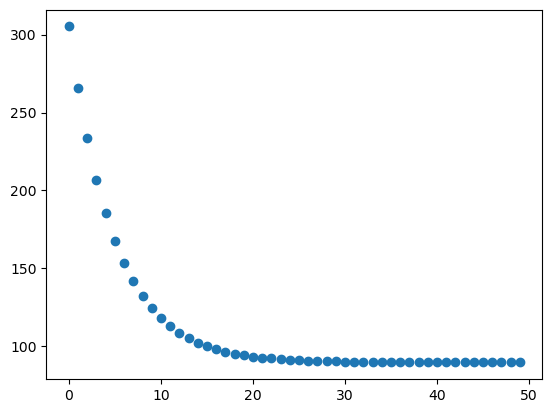

In [110]:
# Plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_list)), J_list)
plt.show()

In [111]:
# Keep playing around with gradient descent until you have a good
# learning curve in the plot above (something that appears to flatten out).
# Then answer the questions below. 

# What was your initial choice for alpha?  Your final choice?  How did
# you arrive at these choices?
#
# 0.001 was my initial choice but I got an overflow error so I realized
# I had to make alpha smaller and kept making it smaller until the plot
# seemed correct. My final choice was 0.00000001.
#
# How many iterations of gradient descent did you need until convergence?
#
# About 30
#
# What was your final vector of weights? (w_manual)
#
# [3.79690635e-06 1.21532878e-05 1.89548643e-04 2.04813052e-04
# 6.63584555e-03 6.61599127e-05 2.99387499e-04]
#
# What was your final cost of these weights? (w_manual_cost)
#
# 89.55635879239824
#
# What was your final vector of weights from Part A? (w_direct)
#
# [-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04
# -6.79461791e-03  8.52732469e-02  7.53367180e-01]
#
# What cost of these weights? (w_direct_cost)
#
# 5.795085490707611
#
# Why do you think the final weights and costs from parts A and B are so different?
#
# Part A is more accurate because it has a lower cost than part B. I think
# because we did not do feature scaling in part B, the gradient descent did not
# converge very well.
#
#




## Part C: Linear regression with feature scaling and matrix computations

 In this section, you will perform linear regression one more time,
 but adding in feature scaling and matrix computations.


In [112]:
# Write code here to take your original data and scale
# all the features using Z-score scaling.
# I recommend doing this using the pandas df_X dataframe,
# then producing a new numpy matrix at the end.
# Call this matrix X_train_normed_initial.
#
# Hint: this first line of this matrix should be:
# [ 1.48205303,  1.07591459,  0.66328508,  0.61974833, -1.2836176, -1.6232409 ]


X_train_normed_initial = (df_X.iloc[:,0] - df_X.iloc[:,0].mean()) / df_X.iloc[:,0].std()
X_train_normed_initial = X_train_normed_initial.to_numpy().reshape(392, 1)

for i in range(1, n):
    arrCol = ((df_X.iloc[:,i] - df_X.iloc[:,i].mean()) / df_X.iloc[:,i].std()).to_numpy().reshape(392,1)
    X_train_normed_initial = np.hstack((X_train_normed_initial, arrCol))

print(X_train_normed_initial.shape)
X_train_normed_initial
    



(392, 6)


array([[ 1.48205303,  1.07591459,  0.66328508,  0.61974833, -1.2836176 ,
        -1.6232409 ],
       [ 1.48205303,  1.48683159,  1.57258478,  0.84225766, -1.4648516 ,
        -1.6232409 ],
       [ 1.48205303,  1.18103289,  1.18288491,  0.53969206, -1.64608561,
        -1.6232409 ],
       ...,
       [-0.86291079, -0.56775341, -0.53179452, -0.80360505, -1.4286048 ,
         1.63432105],
       [-0.86291079, -0.71109655, -0.66169447, -0.41509668,  1.1086713 ,
         1.63432105],
       [-0.86291079, -0.72065276, -0.5837545 , -0.30325336,  1.39864571,
         1.63432105]])

In [113]:
# Verify normed data:

print(X_train_normed_initial.shape) # Should be (392, 6)

# Write code below to add a column of ones to the X_train_normed_initial
# matrix, and produce a new matrix X_train_normed.

X_train_normed = np.hstack((np.ones((m, 1)), X_train_normed_initial))

# Verify new dimensions:

print(X_train_normed.shape) # Should be (392, 7)

(392, 6)
(392, 7)


In [114]:
# Write code below to compute the w vector directly using
# the same matrix equation from Part A, but using the normed
# training data (X_train_normed), not X_train.
# Store this in a vector called w_direct_normed.  
# NOTE: Because the X matrix is now scaled (normalized), w_direct_normed
# will have very different numbers than w_direct.

w_direct_normed =  np.linalg.inv(X_train_normed.T @ X_train_normed) @ X_train_normed.T @ y_train

# Verify:

print(w_direct_normed)

[ 2.34459184e+01 -5.62668108e-01  8.03501684e-01 -1.50637300e-02
 -5.77136585e+00  2.35257301e-01  2.77520621e+00]


In [115]:
# Write code below to compute the cost of this new
# vector of weights (w_direct_normed), and store it in a variable
# called w_direct_normed_cost.  Verify this cost is the same
# cost as w_direct_cost (from Part A).  Again, don't forget to 
# compute the cost for w_direct_normed using X_train_normed.

w_direct_normed_cost = compute_cost(X_train_normed, y_train, w_direct_normed)


# Verify:

print(w_direct_cost)
print(w_direct_normed_cost)

5.795085490707611
5.795085490707613


In [116]:
# Rewrite the compute_cost function as a new version
# (compute_cost_fast) to compute the
# total cost over the entire data set X_data and y_data,
# given parameters vector w, but now use matrix computations
# rather than loops.  Do not call make_prediction.

def compute_cost_fast(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: scalar
    """
        
    return (X_data @ w - y_data).T @ (X_data @ w - y_data) / (2 * m)



In [117]:
# Rewrite the compute_gradient function as a new version
# (compute_gradient_fast) to compute
# the complete gradient for the function J(w).

def compute_gradient_fast(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: array of gradients (n+1)
    """
    
    return X_data.T @ (X_data @ w - y_data) / m
    
    

In [155]:
# Write code here to perform gradient descent, using your
# NEW FAST functions above.  You should use three new variables in your
# code:
# - w_manual_normed: which is the vector of weights that gradient
#   descent is designed to find:
# - w_manual_normed_cost, which is the cost of these weights,
# - J_list_fast, which is the list of 
#   costs determined by compute_cost() [like in the in-class lab we did].

# Setup these vars:
w_manual_normed = np.zeros(n+1)  # n+1 weights
w_manual_normed_cost = 0
J_list_fast = []
ALPHA = 0.45

for i in range(0, 200):
    w_manual_normed_cost = compute_cost_fast(X_train_normed, y_train, w_manual_normed)
    J_list_fast.append(w_manual_normed_cost)
    wj = compute_gradient(X_train_normed, y_train, w_manual_normed)
    w_manual_normed = w_manual_normed - ALPHA * wj


# Verify:
print("Final cost:", w_manual_normed_cost)
print("Final w:", w_manual_normed)

Final cost: 5.7952547877008485
Final w: [ 2.34459184e+01 -5.23534963e-01  7.25746771e-01 -1.48457035e-02
 -5.73644669e+00  2.27707041e-01  2.77294516e+00]


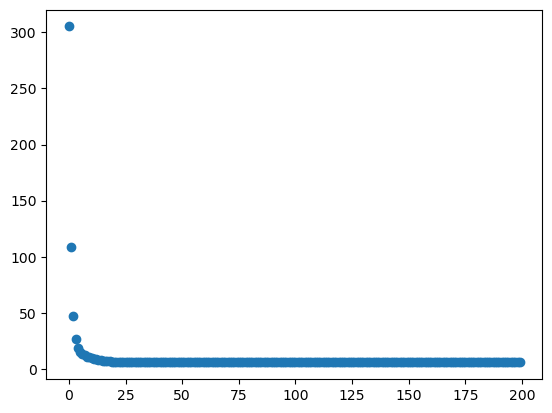

In [156]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_list_fast)), J_list_fast)
plt.show()

In [120]:
# Keep playing around with gradient descent until you have a good
# learning curve in the plot above (something that appears to flatten out).
# Then answer the questions below. 

# What was your initial choice for alpha?  Your final choice?  How did
# you arrive at these choices?
#
# 0.0000001 was my initial choice. My final choice was 0.45. At first, the cost was
# too high so I realized that alpha was big and gradient descent was not able to 
# converge.I kept increasing alpha as the cost kept going down. 
#
# How did your final choice for alpha here (Part C) differ from Part B?
#
# The value of alpha for part B was really small compared to the value of alpha
# in part C.
#
# How many iterations of gradient descent did you need until convergence
# here (Part C) versus Part A?
#
# I needed around 30 until the curve flattens out but needed up to 200 to keep 
# converging.
#
# What was your final vector of weights? (w_manual_normed)
#
# [ 2.34459184e+01 -5.23534963e-01  7.25746771e-01 -1.48457035e-02
# -5.73644669e+00  2.27707041e-01  2.77294516e+00] 
#
# What was your final cost of these weights? (w_manual_cost_normed)
#
# 5.7952547877008485 
#
# What was your final vector of calculated directly ? (w_direct_normed)
#
# [ 2.34459184e+01 -5.62668108e-01  8.03501684e-01 -1.50637300e-02
# -5.77136585e+00  2.35257301e-01  2.77520621e+00] 
#
# What cost of these weights? (w_direct_cost_normed)
#
# 5.795085490707613 
#
# Why do you think the final weights from both sections of Part C are so similar?
#
# Because both final weights converge well and are close to the absolute answer.
#



In [157]:
# Final checkpoint

# All of these should print OK and match up with what you have above:

print("Part A")
print("Weights:", w_direct)
print("Cost:", w_direct_cost)
print()
print("Part B")
print("Weights:", w_manual)
print("Cost:", w_manual_cost)
print()
print("Part C")
print("Weights (calculated directly):", w_direct_normed)
print("Cost:", w_direct_normed_cost)
print()
print("Weights (calculated with gradient descent):", w_manual_normed)
print("Cost:", w_manual_normed_cost)

Part A
Weights: [-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04
 -6.79461791e-03  8.52732469e-02  7.53367180e-01]
Cost: 5.795085490707611

Part B
Weights: [3.79690635e-06 1.21532878e-05 1.89548643e-04 2.04813052e-04
 6.63584555e-03 6.61599127e-05 2.99387499e-04]
Cost: 89.55635879239824

Part C
Weights (calculated directly): [ 2.34459184e+01 -5.62668108e-01  8.03501684e-01 -1.50637300e-02
 -5.77136585e+00  2.35257301e-01  2.77520621e+00]
Cost: 5.795085490707613

Weights (calculated with gradient descent): [ 2.34459184e+01 -5.23534963e-01  7.25746771e-01 -1.48457035e-02
 -5.73644669e+00  2.27707041e-01  2.77294516e+00]
Cost: 5.7952547877008485


# Part D (Bonus; up to 5 extra credit points)

Notice that some of the features in the initial plots at the beginning of the notebook
seem to have non-linear correlations with `mpg`.  Try to add some non-linear features
to the data and see if you can decrease the cost even further.